In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline



# Dataset

In [2]:
data_path = "./data/Median values.csv"
data = pd.read_csv(data_path)
data

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2)
0,Control Fish water,3.317,0.487,0.186,0.029
1,Control \n1% DMSO,3.394,0.451,0.182,0.034
2,C1,3.115,0.436,0.187,0.034
3,C2,0.000,0.000,0.000,0.000
4,C3,3.327,0.419,0.198,0.031
...,...,...,...,...,...
156,C155,0.000,0.000,0.000,0.000
157,C156,3.374,0.444,0.209,0.035
158,C157,3.375,0.392,0.180,0.029
159,C158,3.516,0.381,0.164,0.034


In [3]:
data.isnull().any()
#detect missing values

Compound                       False
Median length- mm              False
Median YOLKSAC BREADTH (mm)    False
Median Yolk sac area(mm2)      False
Median Eye area(mm2)           False
dtype: bool

In [12]:
#data preprocessing
X = data[['Median length- mm' , 'Median YOLKSAC BREADTH (mm)' ,'Median Yolk sac area(mm2)','Median Eye area(mm2)']]
# X = data[['Median length- mm' , 'Median YOLKSAC BREADTH (mm)' ,'Median Yolk sac area(mm2)','Median Eye area(mm2)']].iloc[:,:].to_numpy()
X_minmax_scaled = MinMaxScaler().fit_transform(X)
X_standard_scaled = StandardScaler().fit_transform(X)

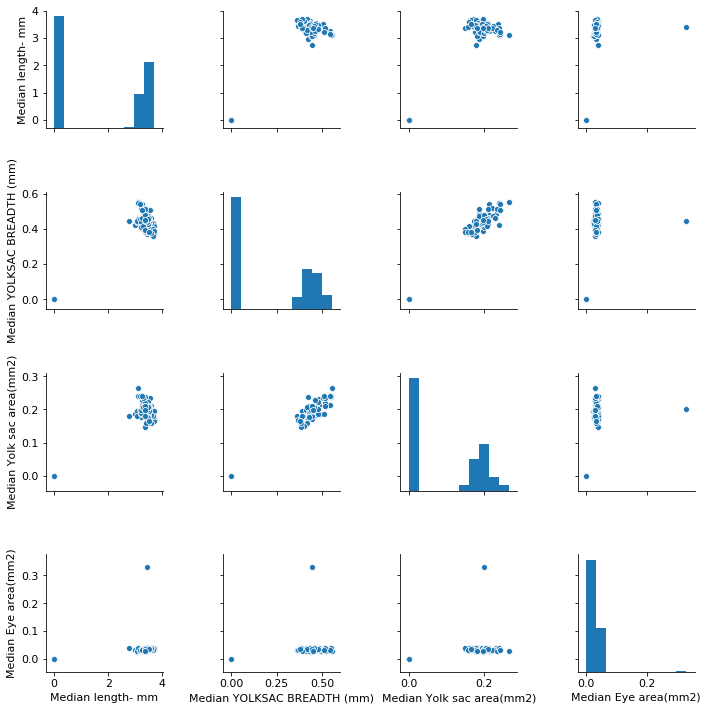

In [13]:
plt.rcParams['font.size'] = 11
sns.pairplot(X)
#Plot pairwise relationships in a dataset.

# 1. KMeans clustering

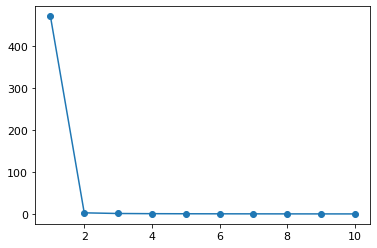

In [14]:
#use elbow method to select optimal number of clusters by fitting the model with a range of values for 𝐾.
X = data[['Median length- mm' , 'Median YOLKSAC BREADTH (mm)' ,'Median Yolk sac area(mm2)','Median Eye area(mm2)']].iloc[:,:].to_numpy()
inertia=[]
for i in range(1,11):  
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=None)
    km.fit(X)
    inertia.append(km.inertia_)
plt.plot(range(1,11),inertia,'o-')

#### Silhouette Coefficient


Evaluate the clustering

In [15]:
from sklearn import metrics

In [16]:
#try 2 clusters to 20 clusters and evaluate the scores.
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)
    
scores

[0.9684348772734013,
 0.7510922359384383,
 0.7178260130748997,
 0.7162244975171463,
 0.7172750147831892,
 0.7159719877021404,
 0.7155900956586532,
 0.7188683881398021,
 0.7155366869816383,
 0.7160379240141929,
 0.7002799460518357,
 0.6996664924762412,
 0.7071314050799528,
 0.6947249057155767,
 0.6979740101516086,
 0.6934606085228775,
 0.6926424956841911,
 0.6939423199776279]

Minmaxscaled data

In [17]:
scores_minmax = []
for k in range(2,20):
    labels_minmax = KMeans(n_clusters=k).fit(X_minmax_scaled).labels_
    score_minmax = metrics.silhouette_score(X_minmax_scaled, labels_minmax)
    scores_minmax.append(score_minmax)
    
scores_minmax

[0.939222328042116,
 0.9084676398801809,
 0.7054735471762579,
 0.7015915023032833,
 0.6812384812644253,
 0.6681096586429793,
 0.663770345754924,
 0.652269817356598,
 0.6462805077127939,
 0.6440808346147723,
 0.6566634080466147,
 0.6448343980112582,
 0.6479510360737105,
 0.6424896866820139,
 0.6466538683312416,
 0.650148973925856,
 0.6450304799709936,
 0.6590082491304551]

Standardscaled data

In [18]:
scores_standard = []
for k in range(2,20):
    labels_standard = KMeans(n_clusters=k).fit(X_standard_scaled).labels_
    score_standard = metrics.silhouette_score(X_standard_scaled, labels_standard)
    scores_standard.append(score_standard)
    
scores_standard

[0.9198431111153367,
 0.9352500324238163,
 0.6859886861393782,
 0.6804955918717943,
 0.6596693322884911,
 0.6488022130141168,
 0.6373305041413702,
 0.635967157488236,
 0.6404876768623433,
 0.6422787484672752,
 0.6437462825255836,
 0.6459759075199217,
 0.637421768873348,
 0.6449613385917147,
 0.6259304042045599,
 0.6476000557720117,
 0.6431974822589059,
 0.6285152221318672]

Text(0, 0.5, 'Sihouette score')

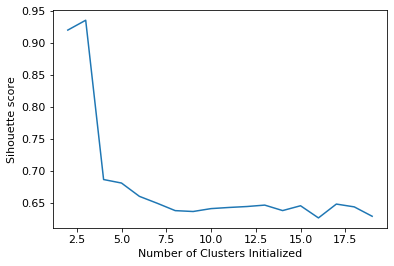

In [19]:
plt.plot(list(range(2,20)), scores_standard)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette score")

## with standardscaled data

In [20]:
km3_standard = KMeans(n_clusters=3).fit(X_standard_scaled)


In [21]:
data['standard_clusters3'] = km3_standard.labels_
data.sort_values('standard_clusters3')
data.to_csv("./data/standard_cluster.csv")

In [22]:
data.groupby('standard_clusters3').mean()
# data.to_csv("./data/cluster.csv")

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2)
standard_clusters3,,,,
0,3.381382,0.446026,0.195645,0.033526
1,0.000000,0.000000,0.000000,0.000000
2,3.426000,0.447000,0.200000,0.330000


In [23]:
standard_centres = data.groupby('standard_clusters3').mean().reset_index()

In [24]:
plt.rcParams['font.size'] = 14
colors = np.array(['orange', 'green', 'red'])


In [25]:
# plt.scatter(data['Median length- mm'], ['Median YOLKSAC BREADTH (mm)'],c=colors[data["standard_clusters3"]])
# plt.scatter(standard_centers.Median length- mm, standard_centers.Median YOLKSAC BREADTH (mm), linewidths=3, marker='+', s=300, c='black')
# plt.xlabel("Median length- mm")
# plt.ylabel("Median YOLKSAC BREADTH (mm)")

Text(0.5, 0.98, 'with 3 centroid initialized')

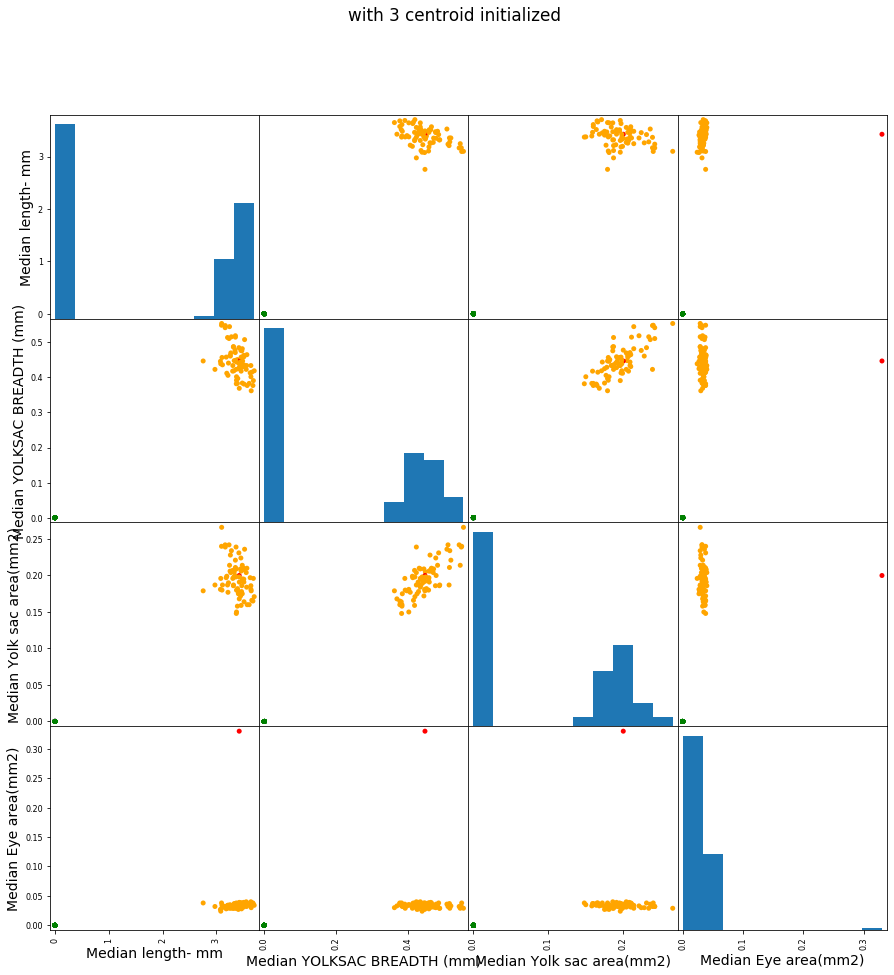

In [26]:
scatter_matrix(data[['Median length- mm' , 'Median YOLKSAC BREADTH (mm)' ,'Median Yolk sac area(mm2)','Median Eye area(mm2)']],s=100, alpha=1, c=colors[data["standard_clusters3"]], figsize=(15,15))
plt.suptitle("with 3 centroid initialized")

In [27]:
clustering_count = pd.DataFrame(data['Compound'].groupby(data['standard_clusters3']).count()).T
clustering_ratio = (clustering_count / len(data)).round(2).rename({'counts':'percentage'})
print(clustering_count)
print("#"*30)
print(clustering_ratio)

standard_clusters3   0   1  2
Compound            76  84  1
##############################
standard_clusters3     0     1     2
Compound            0.47  0.52  0.01


# Kmeans without outlier


In [44]:
# data.to_csv("./data/standard_cluster.csv")
data

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),standard_clusters3
0,Control Fish water,3.317,0.487,0.186,0.029,0
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0
2,C1,3.115,0.436,0.187,0.034,0
3,C2,0.000,0.000,0.000,0.000,1
4,C3,3.327,0.419,0.198,0.031,0
...,...,...,...,...,...,...
156,C155,0.000,0.000,0.000,0.000,1
157,C156,3.374,0.444,0.209,0.035,0
158,C157,3.375,0.392,0.180,0.029,0
159,C158,3.516,0.381,0.164,0.034,0


In [47]:
data_0 = data[data["Median length- mm"]== 0]
# data_0.to_csv("./data/Samples:all values are 0.csv")

In [48]:
data_0

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),standard_clusters3
3,C2,0.0,0.0,0.0,0.0,1
7,C6,0.0,0.0,0.0,0.0,1
10,C9,0.0,0.0,0.0,0.0,1
16,C15,0.0,0.0,0.0,0.0,1
17,C16,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...
148,C147,0.0,0.0,0.0,0.0,1
150,C149,0.0,0.0,0.0,0.0,1
151,C150,0.0,0.0,0.0,0.0,1
155,C154,0.0,0.0,0.0,0.0,1


From the above data we can see that all values in cluster 0 are 0. The value of Median Eye area(mm2) in cluster 2 are almost ten times than the rest. So we take away the samples in cluster 0 and 3 and then do clustering for the rest data.

In [49]:
data_1 = data[data["standard_clusters3"]== 0]
data_1


,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),standard_clusters3
0,Control Fish water,3.317,0.487,0.186,0.029,0
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0
2,C1,3.115,0.436,0.187,0.034,0
4,C3,3.327,0.419,0.198,0.031,0
5,C4,2.975,0.423,0.187,0.032,0
...,...,...,...,...,...,...
154,C153,3.237,0.511,0.242,0.032,0
157,C156,3.374,0.444,0.209,0.035,0
158,C157,3.375,0.392,0.180,0.029,0
159,C158,3.516,0.381,0.164,0.034,0


In [50]:
X1 = data_1[['Median length- mm' , 'Median YOLKSAC BREADTH (mm)' ,'Median Yolk sac area(mm2)','Median Eye area(mm2)']]
X1_standard = StandardScaler().fit_transform(X1)

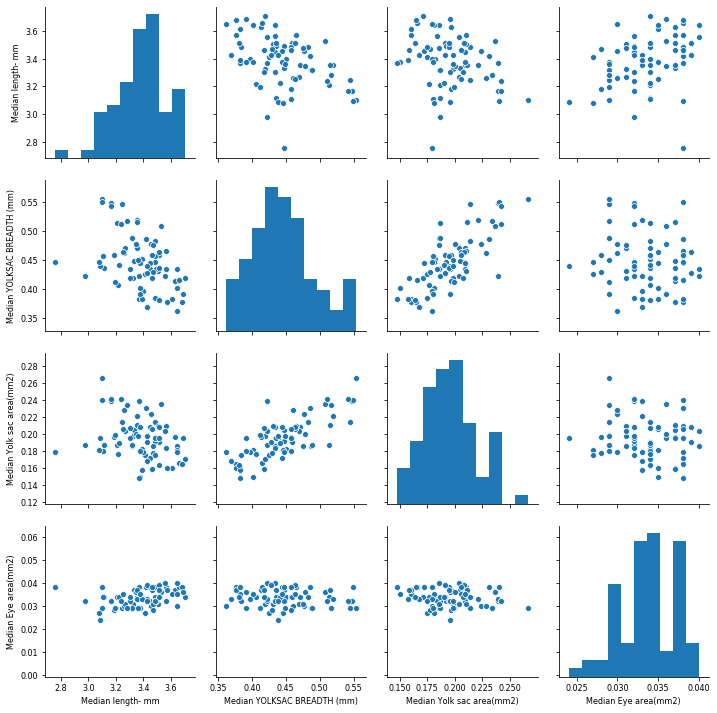

In [53]:
plt.rcParams['font.size'] = 8
sns.pairplot(X1)
#Plot pairwise relationships in a dataset.

In [55]:
from sklearn import metrics
scores1 = []
for k in range(2,10):
    labels1 = KMeans(n_clusters=k).fit(X1_standard).labels_
    score1 = metrics.silhouette_score(X1_standard, labels1)
    scores1.append(score1)
    
scores1

[0.2644657085244586,
 0.2716753305905346,
 0.26957769156756145,
 0.27388728690992364,
 0.26252567787076747,
 0.2595822291815825,
 0.23279229399802465,
 0.2524775827588463]

Text(0, 0.5, 'Sihouette score')

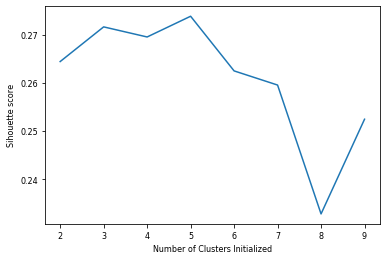

In [57]:
plt.plot(list(range(2,10)), scores1)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette score")

    use Silhouette Coefficient to measure the distance between points and decide how many clusters we use is the best choice. It is not completely accurate, but it can be a reference value.
we select 2 to 10 clusters to evaluate. We found maybe the number of 5 clusters the is best.

In [60]:
km5_standard = KMeans(n_clusters=5).fit(X1_standard)
# km5_standard.labels_

In [61]:
X1['standard_clusters5'] = km5_standard.labels_
X1.sort_values('standard_clusters5')
# X1.sort_values('standard_clusters6').to_csv("./data/standard_cluster6.csv")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),standard_clusters5
0,3.317,0.487,0.186,0.029,0
158,3.375,0.392,0.180,0.029,0
149,3.425,0.439,0.198,0.032,0
141,3.469,0.429,0.178,0.028,0
123,3.474,0.476,0.186,0.031,0
...,...,...,...,...,...
71,3.209,0.514,0.187,0.034,4
2,3.115,0.436,0.187,0.034,4
5,2.975,0.423,0.187,0.032,4
60,3.077,0.446,0.181,0.027,4


In [62]:
X1.groupby('standard_clusters5').mean()

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2)
standard_clusters5,,,,
0,3.358850,0.44510,0.19680,0.029800
1,3.427450,0.45875,0.20745,0.036300
2,3.546500,0.39835,0.17090,0.035250
3,3.206000,0.53550,0.23725,0.031750
4,3.085125,0.44625,0.18350,0.033375


In [63]:
plt.rcParams['font.size'] = 11
colors = np.array(['orange', 'green', 'red', 'yellow', 'blue', 'black'])

Text(0.5, 0.98, 'with 5 centroid initialized')

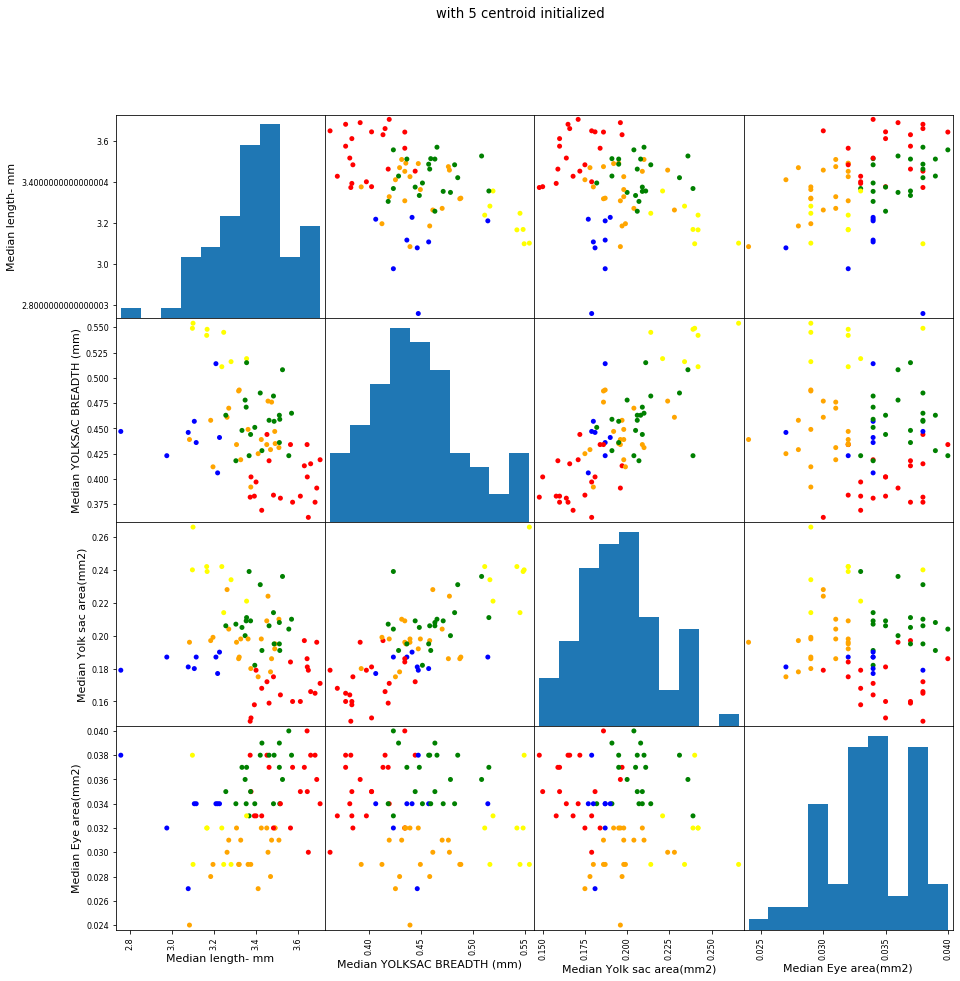

In [65]:
scatter_matrix(X1[['Median length- mm' , 'Median YOLKSAC BREADTH (mm)' ,'Median Yolk sac area(mm2)','Median Eye area(mm2)']],s=100, alpha=1, c=colors[X1["standard_clusters5"]], figsize=(15,15))
plt.suptitle("with 5 centroid initialized")

## KMeans with PCA

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X1_standard)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [71]:
from sklearn import metrics
scores_pca = []
for k in range(2,10):
    labels_pca = KMeans(n_clusters=k).fit(principalComponents).labels_
    score_pca = metrics.silhouette_score(principalComponents, labels_pca)
    scores_pca.append(score_pca)
    
scores_pca

[0.34800907597721087,
 0.38460199377539156,
 0.40153341034162565,
 0.39101883434328105,
 0.39501149176896666,
 0.38897070369744347,
 0.3906279964468934,
 0.4137890899636911]

Text(0, 0.5, 'Sihouette score')

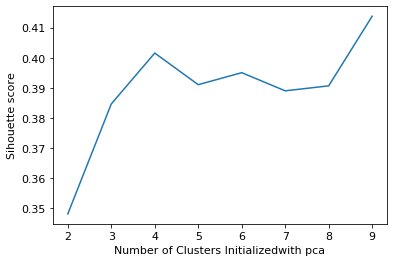

In [72]:
plt.plot(list(range(2,10)), scores_pca)
plt.xlabel("Number of Clusters Initializedwith pca")
plt.ylabel("Sihouette score")

In [91]:
pca_kmeans = KMeans(n_clusters=4).fit(principalComponents)
# pca_kmeans.labels_

In [92]:
principalDf['pca_clusters'] = pca_kmeans.labels_
principalDf

,principal component 1,principal component 2,pca_clusters
0,0.848686,1.011363,0
1,-0.332869,0.049678,0
2,0.320569,0.688342,0
3,0.043383,0.826348,0
4,0.676728,1.527766,0
...,...,...,...
71,2.481501,-0.527778,1
72,0.194228,-0.506771,2
73,-0.713312,1.633520,0
74,-2.018252,0.548784,3


In [93]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = ['0', '1', '2', '3']
# colors = ['r', 'g', 'b', 'orange']
# for target, color in zip(targets,colors):
#     indicesToKeep = principalDf['pca_clusters'] == target
#     ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
#                , principalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

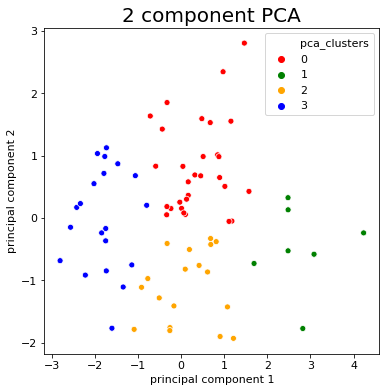

In [117]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (6,6))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_clusters'], palette = ['red', 'green', 'orange', 'blue'])
plt.title('2 component PCA', fontsize = 20)
plt.show()

In [106]:
#concatenate the data_1 with principal components.
data_1

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),standard_clusters3
0,Control Fish water,3.317,0.487,0.186,0.029,0
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0
2,C1,3.115,0.436,0.187,0.034,0
4,C3,3.327,0.419,0.198,0.031,0
5,C4,2.975,0.423,0.187,0.032,0
...,...,...,...,...,...,...
154,C153,3.237,0.511,0.242,0.032,0
157,C156,3.374,0.444,0.209,0.035,0
158,C157,3.375,0.392,0.180,0.029,0
159,C158,3.516,0.381,0.164,0.034,0


In [110]:
data_2 = data_1.drop(columns=["standard_clusters3"], axis=1)
data_2

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2)
0,Control Fish water,3.317,0.487,0.186,0.029
1,Control \n1% DMSO,3.394,0.451,0.182,0.034
2,C1,3.115,0.436,0.187,0.034
4,C3,3.327,0.419,0.198,0.031
5,C4,2.975,0.423,0.187,0.032
...,...,...,...,...,...
154,C153,3.237,0.511,0.242,0.032
157,C156,3.374,0.444,0.209,0.035
158,C157,3.375,0.392,0.180,0.029
159,C158,3.516,0.381,0.164,0.034


In [115]:
principalDf_array = principalDf.to_numpy()
# principalDf_array

In [112]:
data_2['principal component 1'] = principalDf_array[:,0]
data_2['principal component 2'] = principalDf_array[:,1]
data_2['pca_clusters'] = principalDf_array[:,2]

In [114]:
data_2['pca_clusters'] = data_2['pca_clusters'].apply(int)
data_2


,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),principal component 1,principal component 2,pca_clusters
0,Control Fish water,3.317,0.487,0.186,0.029,0.848686,1.011363,0
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,-0.332869,0.049678,0
2,C1,3.115,0.436,0.187,0.034,0.320569,0.688342,0
4,C3,3.327,0.419,0.198,0.031,0.043383,0.826348,0
5,C4,2.975,0.423,0.187,0.032,0.676728,1.527766,0
...,...,...,...,...,...,...,...,...
154,C153,3.237,0.511,0.242,0.032,2.481501,-0.527778,1
157,C156,3.374,0.444,0.209,0.035,0.194228,-0.506771,2
158,C157,3.375,0.392,0.180,0.029,-0.713312,1.633520,0
159,C158,3.516,0.381,0.164,0.034,-2.018252,0.548784,3
